# Mean Regression 

In [1]:
import pandas as pd

In [2]:
tdata=pd.read_csv('Transformed_Housing_Data2.csv')
tdata

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,360000.0,3,2.50,1530.0,1131.0,3.0,0,8,1530.0,0,...,0,0,0,1,0,0,0,0,0,0
21605,400000.0,4,2.50,2310.0,5813.0,2.0,0,8,2310.0,0,...,0,1,0,0,0,0,0,0,0,0
21606,402101.0,2,0.75,1020.0,1350.0,2.0,0,7,1020.0,0,...,0,0,0,1,0,0,0,0,0,0
21607,400000.0,3,2.50,1600.0,2388.0,2.0,0,8,1600.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
tdata['mean_sales']=tdata['Sale_Price'].mean()
tdata['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

In [4]:
import matplotlib.pyplot as plt

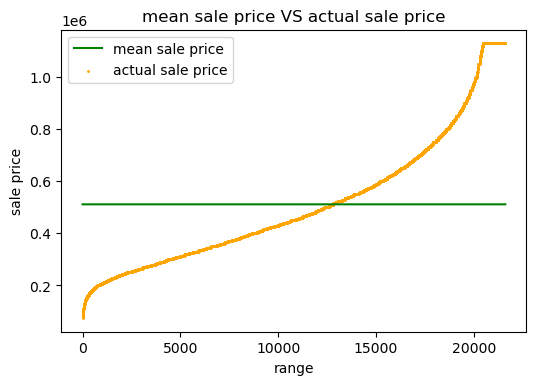

In [5]:
plt.figure(dpi=100)
k=range(0,len(tdata))
plt.scatter(k,tdata['Sale_Price'].sort_values(),color='orange',label='actual sale price',s=1)
plt.plot(k,tdata['mean_sales'].sort_values(),color='green',label='mean sale price')
plt.xlabel('range')
plt.ylabel('sale price')
plt.title('mean sale price VS actual sale price')
plt.legend()


In [6]:
import numpy as np

In [7]:
grades_mean=tdata.pivot_table(values='Sale_Price',columns='Overall Grade',aggfunc=np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [8]:
tdata['grade_mean']=0
for i in grades_mean.columns:
    tdata['grade_mean'][tdata['Overall Grade']==i]=grades_mean[i][0]
    
tdata['grade_mean'].head()

<ipython-input-8-8a2ba274cb02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['grade_mean'][tdata['Overall Grade']==i]=grades_mean[i][0]
<ipython-input-8-8a2ba274cb02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata['grade_mean'][tdata['Overall Grade']==i]=grades_mean[i][0]


0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

In [9]:
gradewise_list=[]
for i in range(1,11):
    k=tdata['Sale_Price'][tdata['Overall Grade']==i]
gradewise_list.append(k)

In [10]:
classwise_list=[]
for i in range(1,11):
    k=tdata['Sale_Price'][tdata['Overall Grade']==i]
classwise_list.append(k)

In [11]:
grademean_difference=tdata['grade_mean']-tdata['Sale_Price']
mean_difference=tdata['mean_sales']-tdata['Sale_Price']

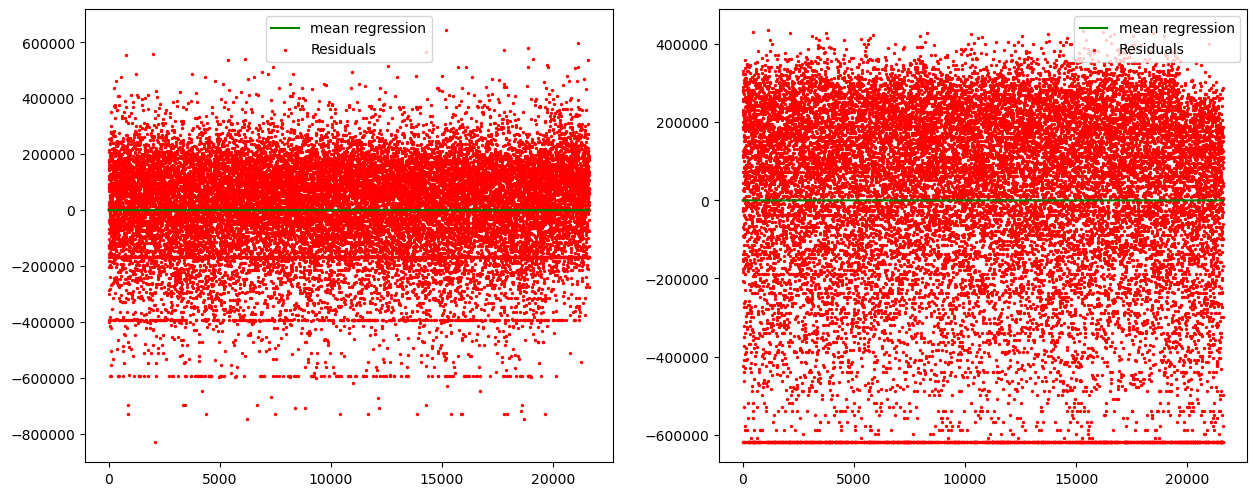

In [12]:
k=range(0,len(tdata))
l=[0 for i in range(len(tdata))]
plt.figure(figsize=(15,6),dpi=100)
plt.subplot(1,2,1)
plt.scatter(k,grademean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean regression')
plt.xlabel=("Fitted points")
plt.ylabel=("Residuals")
plt.title=("Residuals with respect to grades")
plt.legend()
 


 
plt.subplot(1,2,2)
plt.scatter(k,mean_difference,color='red',label='Residuals',s=2)
plt.plot(k,l,color='green',label='mean regression')
plt.xlabel=("Fitted points")
plt.ylabel=("Residuals")
plt.title=("Residuals with respect to grades")
plt.legend()
 


# EVOLUATION MATRICS(MAE,MSE,RMSE)

In [13]:
y=tdata['Sale_Price']
y_hat1=tdata['grade_mean']
y_hat2=tdata['mean_sales']
n=len(tdata)

In [14]:
cost_mean=sum(abs(y_hat2-y))/n
cost_mean

199168.78146839526

In [15]:
costgrade_mean=sum(abs(y_hat1-y))/n
costgrade_mean

137081.70298203363

In [16]:
from sklearn.metrics  import mean_absolute_error as mae
costgrade_mean=mae(y_hat1,y)
costgrade_mean

137081.7029820291

In [17]:
from sklearn.metrics import mean_squared_error as mse
cost_mean=mse(y_hat2,y)
cost_mean

62528116847.799576

In [18]:
cost_mean=mse(y_hat2,y)**0.5
cost_mean

250056.2273725643

In [19]:
sale_price=tdata['Sale_Price'].head(30)
flat_area=tdata['Flat Area (in Sqft)'].head(30)
sample_data=pd.DataFrame({
    'sale_price':sale_price,'flat_area':flat_area
})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


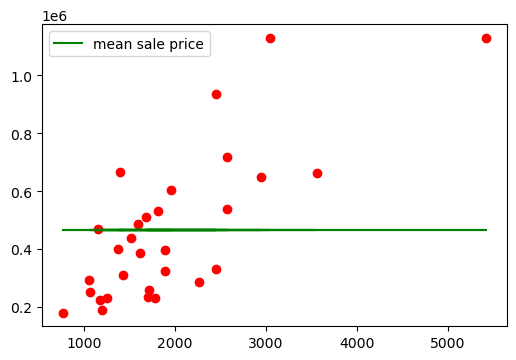

In [20]:
sample_data['mean_sale_price']=sample_data.sale_price.mean()
plt.figure(dpi=100)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color="red")
plt.plot(sample_data.flat_area,sample_data.mean_sale_price,color='green',label='mean sale price')
plt.legend()
plt.show()

# Cost Function Curve

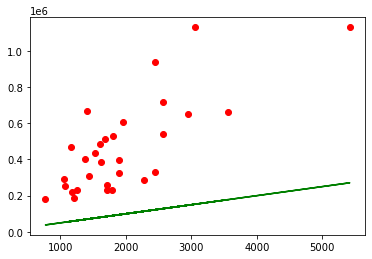

184728400708.33334

In [21]:
m=50
c=0
line=[]
for i in range(len(sample_data)):
    line.append(m*sample_data.flat_area[i]+c)

plt.plot(sample_data.flat_area,line,color='green')
plt.scatter(sample_data.flat_area,sample_data.sale_price,color='red')
plt.show()
mse(sample_data.sale_price,line)

In [22]:
 def error(slope,intercept,sample_data):
        sale=[]
        for i in range(len(sample_data.flat_area)):
            sale.append(slope*sample_data.flat_area[i]+intercept)
        MSE=mse(sample_data.sale_price,sale)
        return MSE

In [23]:
slope=[i/10 for i in range(0,5000)]
cost=[]
for i in slope:
    cost.append(error(slope=i,intercept=0,sample_data=sample_data))


In [24]:
cost_table=pd.DataFrame({
    'slope':slope,
    'cost':cost
})
cost_table.tail()

,slope,cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


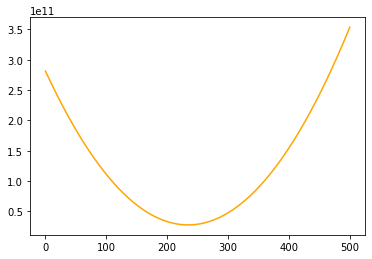

In [25]:
plt.plot(cost_table.slope,cost_table.cost,color='orange')

In [26]:
 cost_table['slope'][cost_table['cost']==cost_table['cost'].min()].values

array([234.3])

In [27]:
intercept=[i for i in range(5000,50000)]
cost=[]
for i in intercept:
    cost.append(error(slope=219,intercept=i,sample_data=sample_data))
    


In [28]:
cost_table2=pd.DataFrame({
    'intercept':intercept,
    'cost':cost
})
cost_table2.head()

,intercept,cost
0,5000,2.858881e+10
1,5001,2.858874e+10
2,5002,2.858867e+10
3,5003,2.858860e+10
4,5004,2.858853e+10


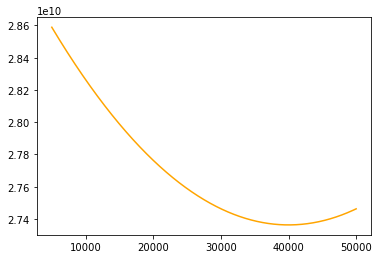

In [29]:
plt.plot(cost_table2.intercept,cost_table2.cost,color='orange')

In [30]:
cost_table2['intercept'][cost_table2['cost']==cost_table2['cost'].min()].values

array([40012], dtype=int64)

# Gradiant Decent

In [31]:
def param_init(y):
    m=0.1
    c=y.mean()
    return m,c

In [32]:
def generate_predictions(m,c,x):
    prediction=[]
    for x in x:
        pred=m*x+c
        prediction.append(pred)
        return prediction
    

In [33]:
def compute_cost(prediction,y):
    cost=mse(y,prediction)
    return cost
    

In [34]:
def gradiants(prediction,y,x):
    n=len(y)
    gm=2/n*np.sum((prediction-y)*x)
    gc=2/n*np.sum((prediction-y))
    return gm,gc

In [35]:
def update_param(m_old,c_old,gm_old,gc_old,alpha):
    m_new=m_old-alpha*gm_old
    c_new=c_old-alpha*gc_old
    return m_new,c_new

In [36]:
def result(m,c,x,y,cost,predicton,i):
    if i<max_iter-1:
        print("gradient decent has converged at iteration{}".format(i))
    else:
        print("result after",ma_iter,"iteration is:")
    plt.scatter(x,y)
    plt.plot(x,prediction)
        

In [37]:
from sklearn.preprocessing import StandardScaler
sale_price=StandardScaler().fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area=StandardScaler().fit_transform(sample_data['flat_area'].values.reshape(-1,1))
max_iter=1000
cost_old=0
alpha=0.01
m,c=param_init(sale_price)
for i in range(0,max_iter):
    prediction=generate_predictions(m,c,flat_area)
    cost_new=compute_cost(prediction,sample_data['sale_price']
    if abs(cost_new - cost_old) < 10**(-7):
        break
    gm,gc=gradiants(prediction,sale_price,flat_area)
    m,c=update_param(m,c,gm,gc,alpha)
    if i%20==0:
        print('after iteration',i,';m=',m,';c=',c,';cost=',cost_new)
    cost_old=cost_new
result(m,c,flat_area,sale_price,cost_new,prediction,i)
        
    


SyntaxError: invalid syntax (<ipython-input-37-c7ca0984993e>, line 11)

In [ ]:
from sklearn.preprocessing import StandardScaler
flat_area=StandardScaler().fit_transform(sample_data['flat_area'].values.reshape(-1,1))
flat_area

# Linear regression and removing Multicollinearty

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [39]:
data=pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


# Scaling Dataset

In [67]:
def log_trans(data):
    return np.log(data)

In [68]:
data['Area of the House from Basement (in Sqft)']=data['Area of the House from Basement (in Sqft)'].map(log_trans)

In [69]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
y=data['Sale_Price']
x=scale.fit_transform(data.drop(columns=['Sale_Price']))
x=pd.DataFrame(data=x,columns=data.drop(columns=['Sale_Price']).columns)
x.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.752122,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.672689,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.750497,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-1.025114,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,0.074118,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Checking and removing Multicollinearity

In [70]:
x.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.514917,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.694711,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.842828,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.162421,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.547594,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.158648,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.722005,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.514917,0.694711,0.842828,0.162421,0.547594,0.158648,0.722005,1.000000,-0.050613,-0.450951,...,0.060711,-0.017390,-0.056582,-0.098789,0.092744,0.057198,0.123265,0.029638,0.125510,0.066043
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.050613,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.450951,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [71]:
k=x.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if(k.loc[i,j] > abs(0.5)) & (i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

# Variance Inflation Factor(VIF)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.Series([variance_inflation_factor(x.values,i) for i in range(len(x.columns))],index=x.columns)
VIF

No of Bedrooms                                 1.755094
No of Bathrooms                                3.382057
Flat Area (in Sqft)                           18.650357
Lot Area (in Sqft)                             2.109670
No of Floors                                   2.171083
No of Times Visited                            1.432904
Overall Grade                                  3.105801
Area of the House from Basement (in Sqft)     16.491064
Basement Area (in Sqft)                        5.569315
Age of House (in Years)                        2.629589
Latitude                                       2.472420
Longitude                                      1.697678
Living Area after Renovation (in Sqft)         3.066610
Lot Area after Renovation (in Sqft)            2.144337
Years Since Renovation                         2.788913
Condition_of_the_House_Excellent              53.604621
Condition_of_the_House_Fair                  166.179794
Condition_of_the_House_Good                  141

In [44]:
VIF[VIF==VIF.max()].index[0]

'Flat Area (in Sqft)'

In [73]:
 def mc_remover(data):
        vif=pd.Series([variance_inflation_factor(data.values,i) for i in range(data.shape[1])],index=data.columns)
        if vif.max()>5:
            print(vif[vif==vif.max()].index[0],'has been removed')
            data=data.drop(columns=[vif[vif==vif.max()].index[0]])
            return data
        else:
            print('no collinearity is present')
            return data

In [74]:
for i in range(7):
    x=mc_remover(x)
    
x.head()

Condition_of_the_House_Fair has been removed
Flat Area (in Sqft) has been removed
no collinearity is present
no collinearity is present
no collinearity is present
no collinearity is present
no collinearity is present


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.752122,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.672689,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.750497,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-1.025114,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,0.074118,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Dividing Test And Train Data

In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15126 entries, 17219 to 13151
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No of Bedrooms                             15126 non-null  float64
 1   No of Bathrooms                            15126 non-null  float64
 2   Lot Area (in Sqft)                         15126 non-null  float64
 3   No of Floors                               15126 non-null  float64
 4   No of Times Visited                        15126 non-null  float64
 5   Overall Grade                              15126 non-null  float64
 6   Area of the House from Basement (in Sqft)  15126 non-null  float64
 7   Basement Area (in Sqft)                    15126 non-null  float64
 8   Age of House (in Years)                    15126 non-null  float64
 9   Latitude                                   15126 non-null  float64
 10  Longitude         

# implementing Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [77]:
lr.coef_

array([ -6893.8864106 ,  16620.14640569,  16856.61694815,   1494.18106107,
        26690.1539838 ,  58082.44882555,  75151.48070399,  25045.81612011,
        30656.39465043,  22075.2105296 , -25611.49753708,  24678.5517135 ,
        -2110.20569142, -10470.33947752,  13247.04245023,   3483.38707844,
        -1741.2008129 ,  13773.81578653,  11499.16262778,  11810.15769634,
        33892.96485533,  63449.37692197,  81002.94036426,  50842.13300469,
        73552.74877247,  39936.72168412,  68315.00812531,  23179.14462842])

In [78]:
predictions=lr.predict(x_test)
lr.score(x_test,y_test)

0.8423416543192737

In [53]:
residuals=predictions-y_test
residual_table=pd.DataFrame({
    'residuals':residuals,
    'predictions':predictions
})
residual_table=residual_table.sort_values(by='predictions')

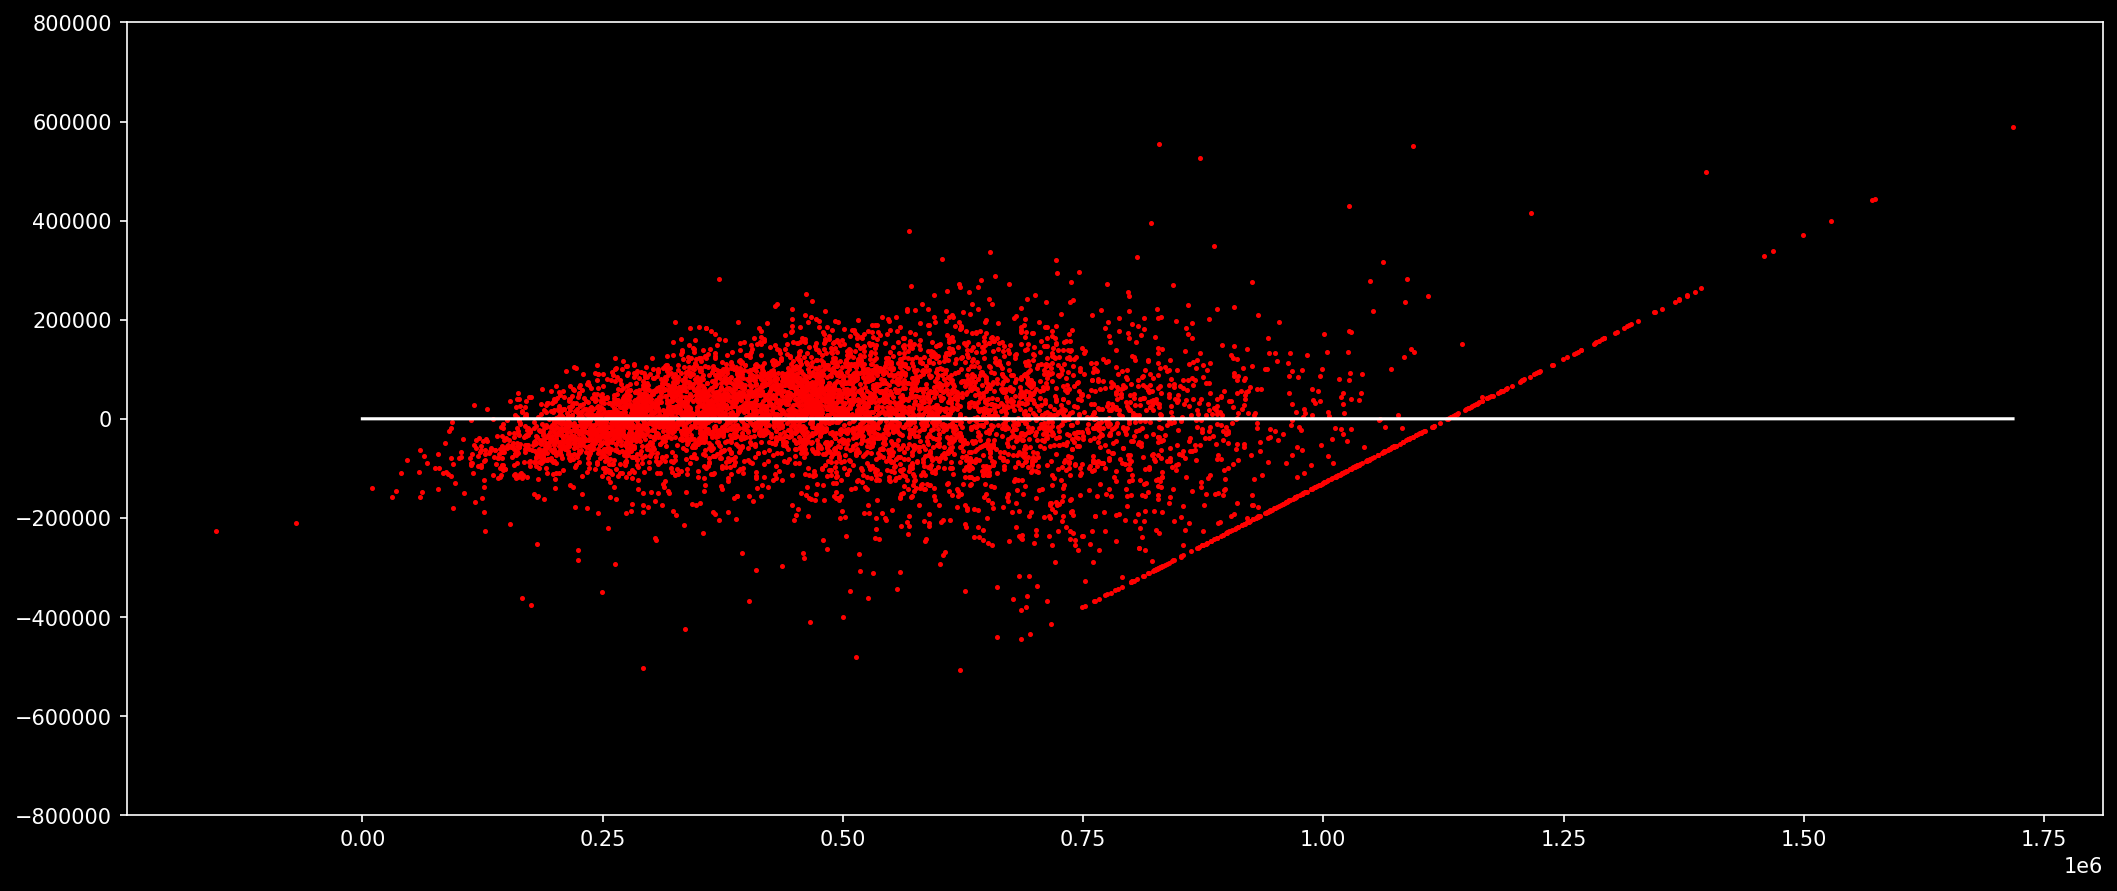

In [54]:
plt.figure(dpi=150,figsize=(17,7))

z=[0 for i in range(int(residual_table.predictions.max()))]
k=[i for i in range(int(residual_table.predictions.max()))]
plt.scatter(residual_table.predictions,residual_table.residuals,color='red',label='residual plot',s=2)
plt.plot(k,z,color='white')
plt.ylim(-800000,800000)
plt.show()

# Distribustion Error

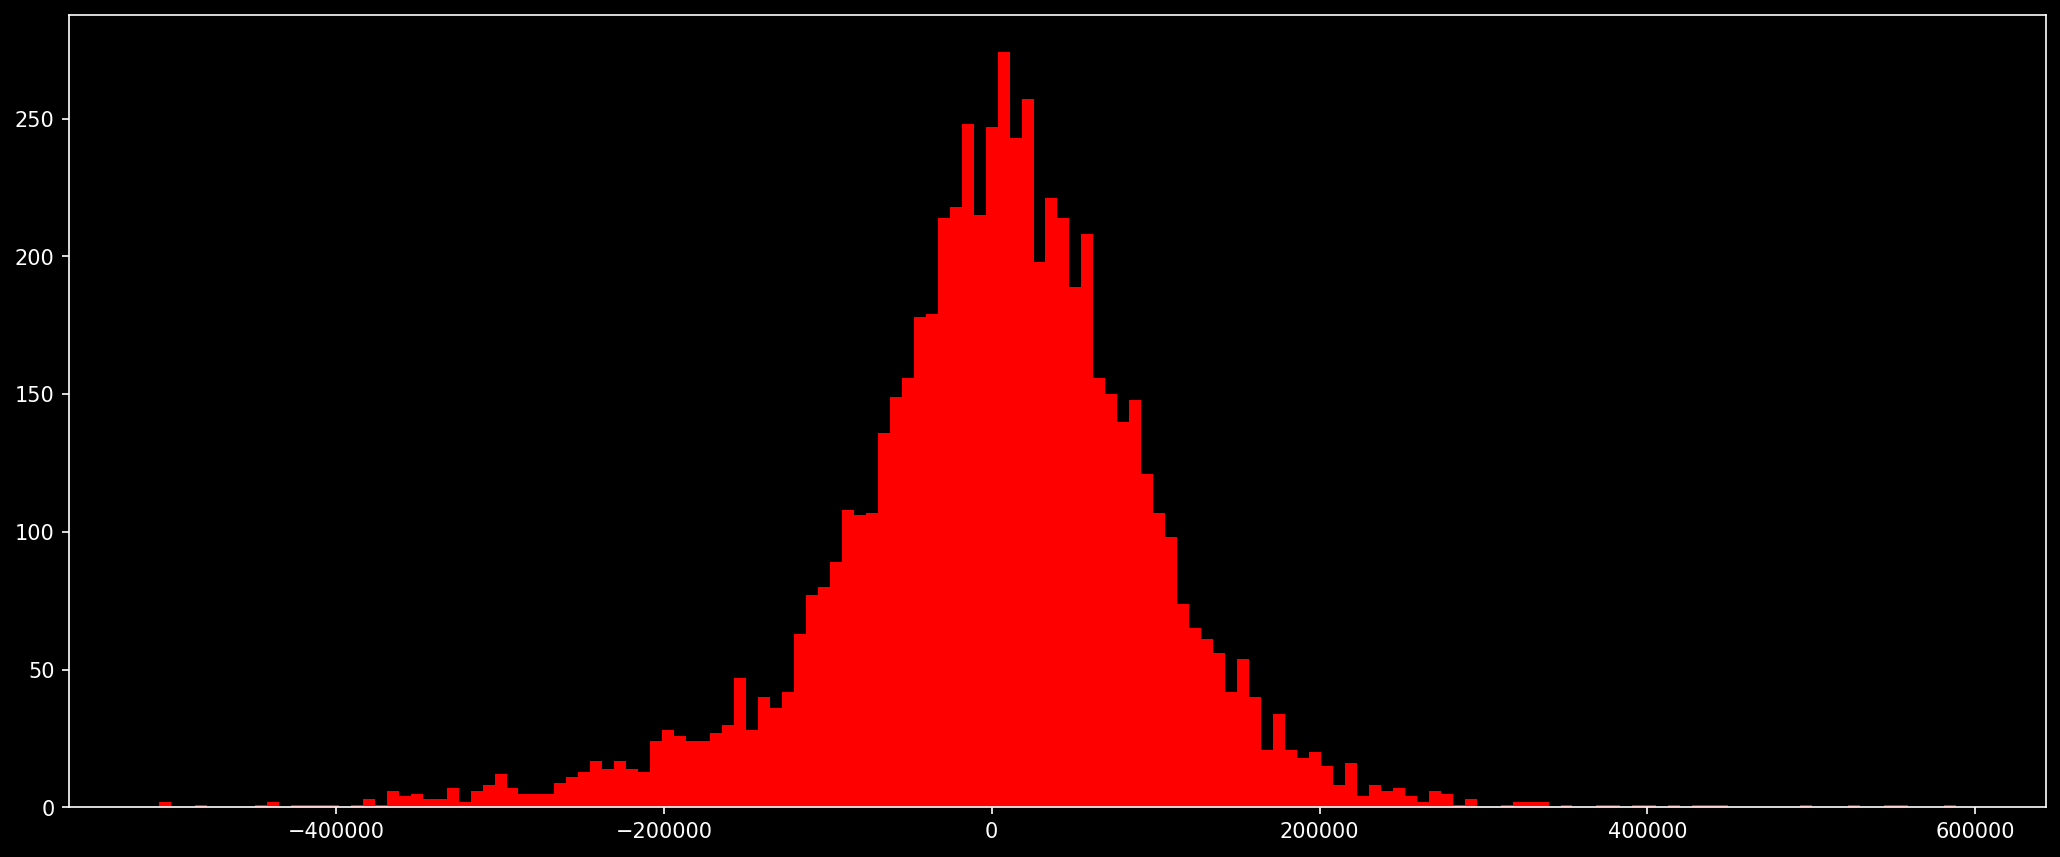

In [55]:
plt.figure(dpi=150,figsize=(17,7))
plt.hist(residual_table.residuals,bins=150,color='red')
plt.show()

In [57]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15126 entries, 17219 to 13151
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   No of Bedrooms                             15126 non-null  float64
 1   No of Bathrooms                            15126 non-null  float64
 2   Lot Area (in Sqft)                         15126 non-null  float64
 3   No of Floors                               15126 non-null  float64
 4   No of Times Visited                        15126 non-null  float64
 5   Overall Grade                              15126 non-null  float64
 6   Area of the House from Basement (in Sqft)  15126 non-null  float64
 7   Basement Area (in Sqft)                    15126 non-null  float64
 8   Age of House (in Years)                    15126 non-null  float64
 9   Latitude                                   15126 non-null  float64
 10  Longitude         

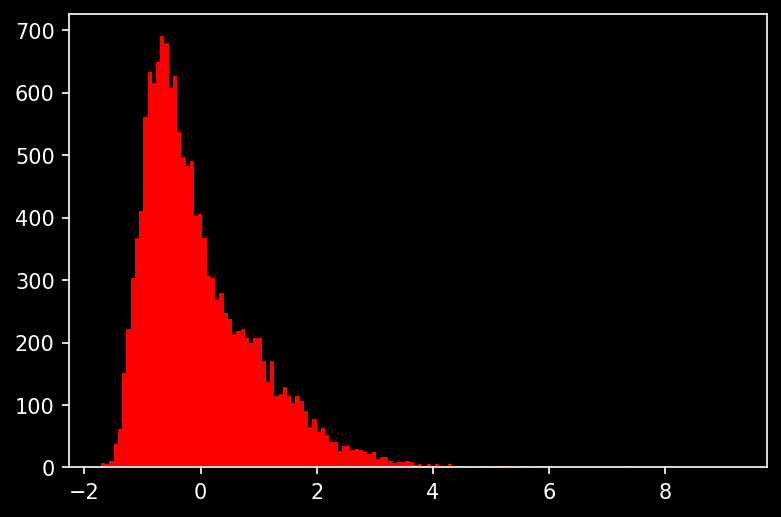

In [58]:
plt.figure(dpi=150)
plt.hist(x_train['Area of the House from Basement (in Sqft)'],bins=150,color='red')
plt.show()

In [59]:
def log_trans(data):
    return np.log(data)